### Question 1: Extract Tesla Stock Data

In [4]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=b4ec31306d1e74955a9c789447f06bc660221e275efe8ba09a6de43a08973614
  Stored in directory: /home/jovyan/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [12]:
def make_graph(stock_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'], stock_data['Close'], label=title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.title(title)
    plt.legend()
    plt.show()

### Question 1: Extract Tesla Stock Data

In [5]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


### Question 2: Extract Tesla Revenue Data

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Function to extract revenue table from Macrotrends
def get_revenue_data(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")
    # Find the correct revenue table
    revenue_table = None
    for table in tables:
        if "Revenue" in str(table):
            revenue_table = table
            break
    if revenue_table is not None:
        revenue_df = pd.read_html(StringIO(str(revenue_table)))[0]
        revenue_df.columns = ["Date", "Revenue"]
        revenue_df = revenue_df.dropna()  # Remove missing values
        return revenue_df
    else:
        print("Revenue table not found!")
        return None

# Question 2: Extract Tesla Revenue Data
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue = get_revenue_data(url_tesla)

if tesla_revenue is not None:
    print(tesla_revenue.tail())



    Date Revenue
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117
15  2009    $112


### Question 3: Extract GME Stock Data

In [10]:

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


### Question 4: Extract GME Revenue Data

In [22]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_revenue = get_revenue_data(url_gme)
print(gme_revenue.tail())

    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


### Question 5: Plot Tesla Stock Graph


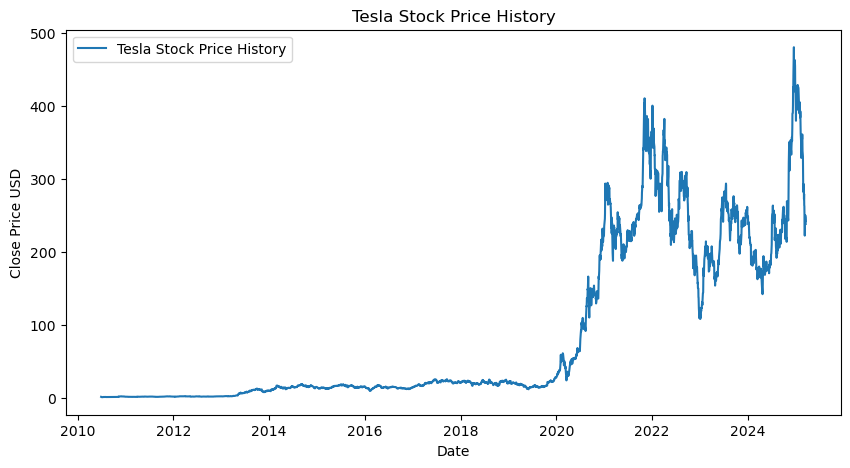

In [18]:
make_graph(tesla_data, "Tesla Stock Price History")

### Question 6: Plot GameStop Stock Graph


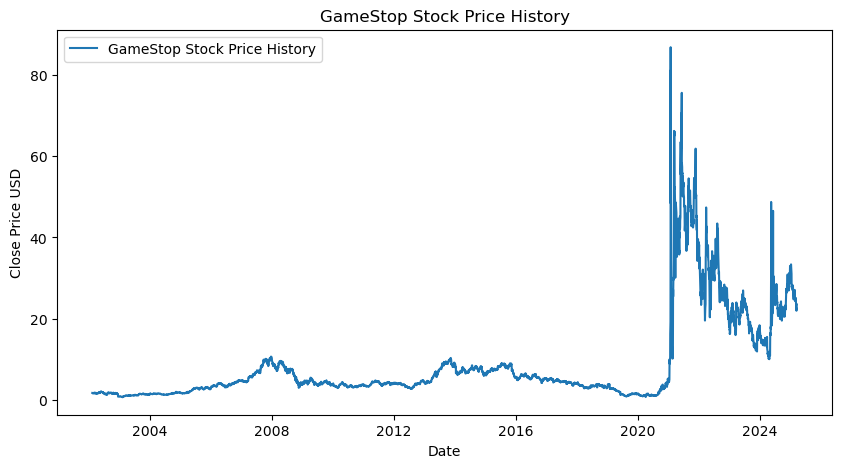

In [19]:
make_graph(gme_data, "GameStop Stock Price History")

In [20]:
pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 50.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


    Date Revenue
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117
15  2009    $112
    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806
